# UNAD
## Cristian Camilo Aranda Sandoval
##  Predecir quién sobrevivió al naufragio del titanic


## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [10]:
#Cargar las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Titanic-Dataset.csv')

In [12]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

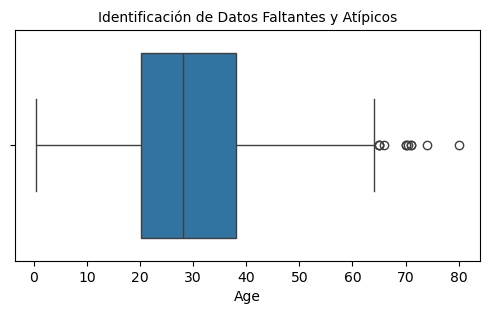

In [14]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

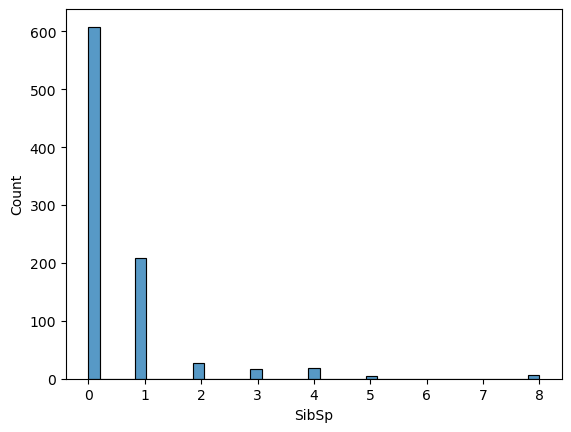

In [15]:
#Identificación de Datos Faltantes y Atípicos

sns.histplot(Datos['SibSp'],kde=False)
plt.show()

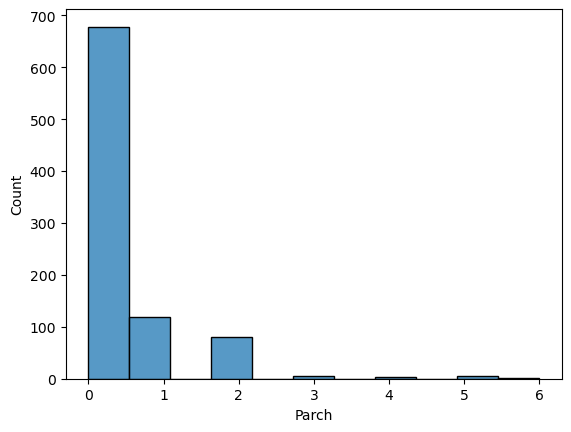

In [16]:
#Identificación de Datos Faltantes y Atípicos

sns.histplot(Datos['Parch'],kde=False)
plt.show()

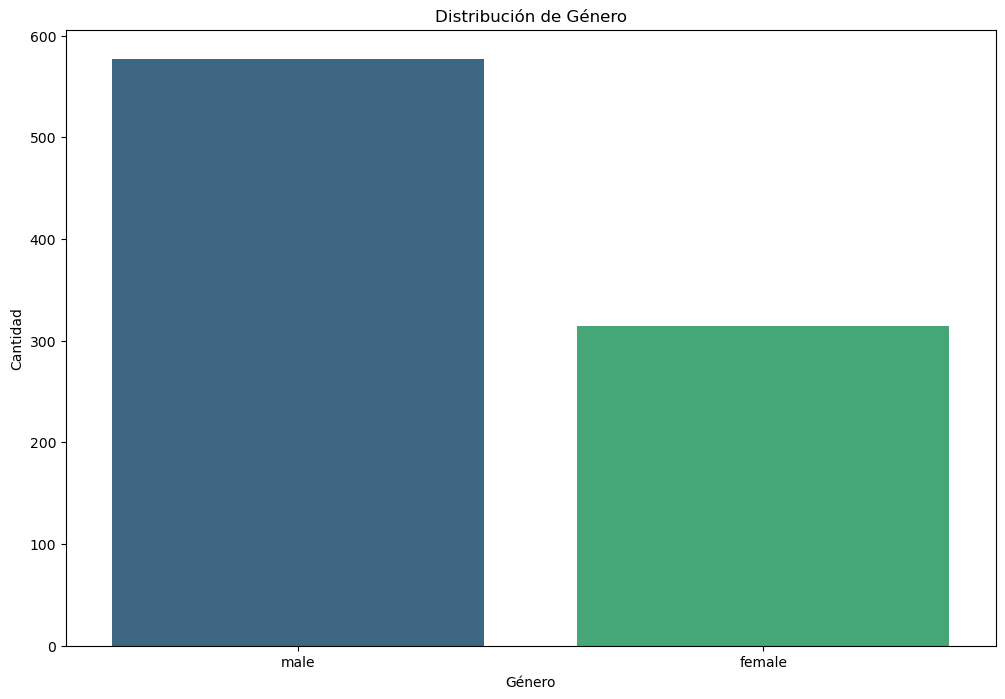

In [17]:

# Contando las frecuencias de la columna 'Sex'
sex_counts = Datos['Sex'].value_counts()

# Crear el gráfico de barras con la advertencia corregida
plt.figure(figsize=(12, 8))
sns.barplot(x=sex_counts.index, y=sex_counts.values, hue=sex_counts.index, palette='viridis', legend=False)

# Títulos y etiquetas
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


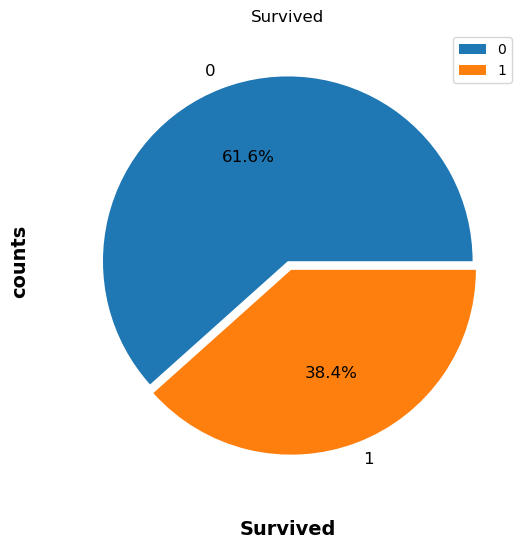

In [22]:
Survived_counts=Datos['Survived'].value_counts()
Survived_counts
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [26]:
#Revisión de datos faltantes

print("Cantidad de Registros con NaN en Age: ",Datos['Age'].isnull().sum())
print("Cantidad de Registros con NaN en Embarked': ",Datos['Embarked'].isnull().sum())
print("Cantidad de Registros con NaN en Cabin': ",Datos['Cabin'].isnull().sum())

Datos.isnull().sum().sort_values(ascending=False)




Cantidad de Registros con NaN en Age:  177
Cantidad de Registros con NaN en Embarked':  2
Cantidad de Registros con NaN en Cabin':  687


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

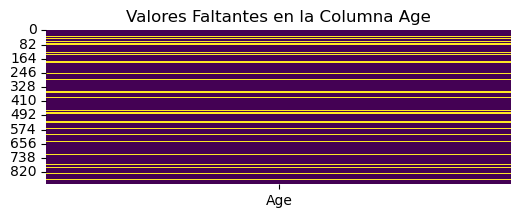

In [30]:
#Identificación de Datos Atípicos
plt.figure(figsize=(6, 2))
sns.heatmap(Datos[['Age']].isna(), cbar=False, cmap='viridis')
plt.title('Valores Faltantes en la Columna Age', fontsize=12)
plt.show()


In [33]:


# Eliminar filas donde 'Age' es NaN
Datos = Datos.dropna(subset=['Age'])

# Verificar resultado
print(Datos)



     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [35]:
print("Cantidad de Registros con NaN en Age: ",Datos['Age'].isnull().sum())

Cantidad de Registros con NaN en Age:  0


In [37]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:
* Age: Edad de la persona
* Sex: Sexo de la persona
* Survived: Si sobrevivio o no

In [73]:
# Total de vehiculos con su precio

Datos['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [75]:
# Total de tipo de sexo

Datos['Sex'].value_counts()

Sex
male      453
female    261
Name: count, dtype: int64

In [77]:
# Total de Personas que sobrevivieron

Datos['Survived'].value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

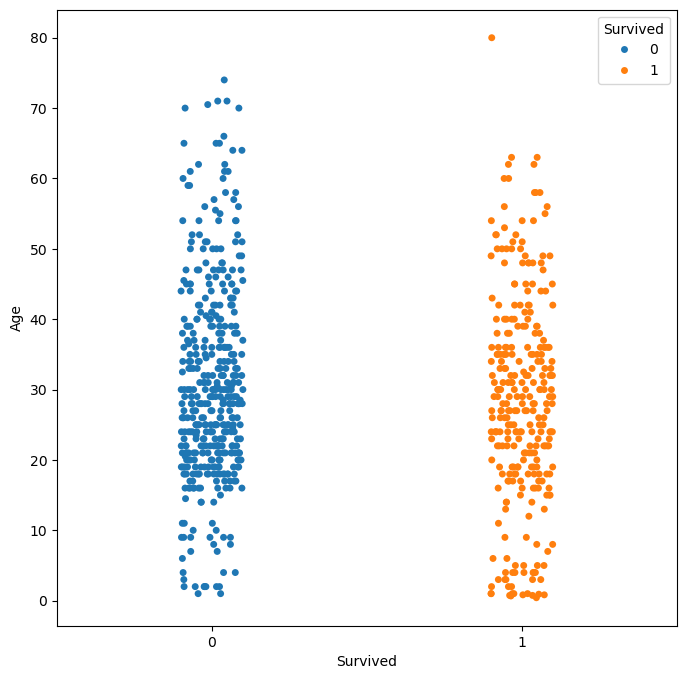

In [79]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Survived", y="Age",hue='Survived', data=Datos)
plt.show()

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [82]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Eliminar columnas irrelevantes (Name, Sex, etc.)
X = Datos.drop(columns=['Survived'])  # Asegúrate de que 'Name' y 'Sex' no están en X
Y = Datos['Survived']

# Verificar si hay columnas no numéricas
print("Tipos de datos en X antes de transformación:")
print(X.dtypes)

# Identificar y transformar columnas categóricas en X
categorical_cols = X.select_dtypes(include=['object']).columns  # Columnas categóricas

if len(categorical_cols) > 0:
    for col in categorical_cols:
        le = LabelEncoder()  # Codificación de etiquetas
        X[col] = le.fit_transform(X[col])

# Verificar si hay valores faltantes
print("Valores faltantes en X:")
print(X.isnull().sum())

# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Verificación del tamaño de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de Y_train: {Y_train.shape}")
print(f"Tamaño de Y_test: {Y_test.shape}")




Tipos de datos en X antes de transformación:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Valores faltantes en X:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Tamaño de X_train: (535, 11)
Tamaño de X_test: (179, 11)
Tamaño de Y_train: (535,)
Tamaño de Y_test: (179,)


In [84]:
print (X_train)

     PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket      Fare  \
535          536       2   308    0   7.0      0      2     450   26.2500   
129          130       3   219    1  45.0      0      0     259    6.9750   
491          492       3   700    1  21.0      0      0     514    7.2500   
703          704       3   250    1  25.0      0      0     362    7.7417   
313          314       3   319    1  28.0      0      0     310    7.8958   
..           ...     ...   ...  ...   ...    ...    ...     ...       ...   
883          884       2    61    1  28.0      0      0     445   10.5000   
238          239       2   530    1  19.0      0      0     190   10.5000   
789          790       1   281    1  46.0      0      0     467   79.2000   
704          705       3   295    1  26.0      1      0     324    7.8542   
856          857       1   693    0  45.0      1      1     363  164.8667   

     Cabin  Embarked  
535    134         2  
129    134         2  
491   

In [86]:
print (Y_train)

535    1
129    0
491    0
703    0
313    0
      ..
883    0
238    0
789    0
704    0
856    1
Name: Survived, Length: 535, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [89]:
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train)
Prediccion = modelo_regresion.predict(X_test)
print(f"Predicciones: {Prediccion}")
print(f"Y_test: {Y_test.values}")





Predicciones: [1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0]
Y_test: [0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [92]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       103
           1       0.77      0.75      0.76        76

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

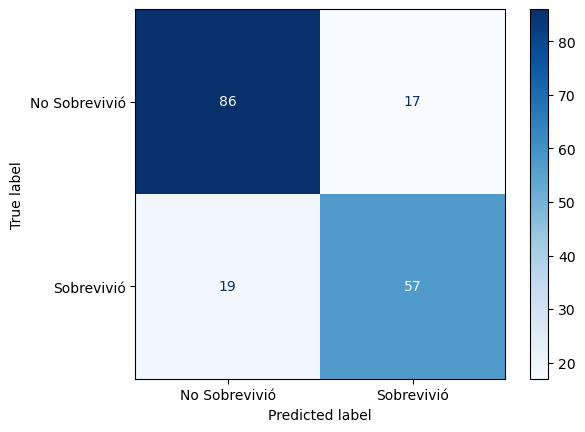

In [95]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, Prediccion)

# Mostrar la matriz de confusión 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Sobrevivió', 'Sobrevivió'])
disp.plot(cmap='Blues')




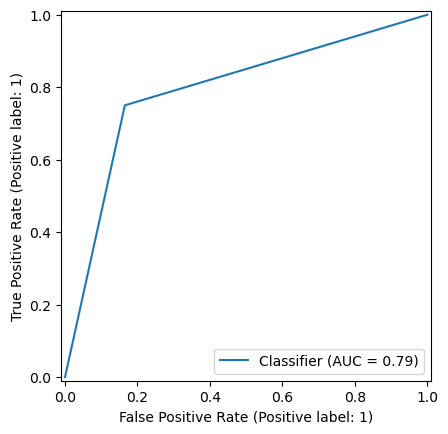

In [97]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

Precisión (Precision):
La precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Para la clase "0" (No sobrevivió), la precisión es 0.82, lo que significa que el 82% de los individuos que el modelo predijo como no sobrevivientes realmente no sobrevivieron. Para la clase "1" (Sobrevivió), la precisión es 0.77, lo que indica que el 77% de los individuos predichos como sobrevivientes realmente lo fueron.

Recall:
El recall mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Para la clase "0" (No sobrevivió), el recall es 0.83, lo que indica que el modelo identificó correctamente al 83% de los individuos que realmente no sobrevivieron. Para la clase "1" (Sobrevivió), el recall es 0.75, lo que significa que el modelo identificó correctamente al 75% de todos los sobrevivientes.

F1 Score:
El F1 Score es la media armónica de la precisión y el recall. Proporciona una puntuación única que equilibra estos dos valores. Para la clase "0" (No sobrevivió), el F1 Score es 0.83, mientras que para la clase "1" (Sobrevivió) es 0.76, indicando un equilibrio moderado entre precisión y recall para ambas clases.

Exactitud (Accuracy):
La exactitud general del modelo es 0.80, lo que significa que el 80% de las predicciones del modelo fueron correctas, considerando tanto las predicciones de sobrevivientes como de no sobrevivientes.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos (TN): El recuento de observaciones que un clasificador predijo correctamente como no sobrevivientes (0), que es 86.

Verdaderos positivos (TP): El recuento de observaciones que un clasificador predijo correctamente como sobrevivientes (1), que es 17.

Falsos positivos (FP): El recuento de observaciones que un clasificador predijo incorrectamente como sobrevivientes (1), cuando en realidad no lo eran. En este caso, es 19.

Falsos negativos (FN): El recuento de observaciones que un clasificador predijo incorrectamente como no sobrevivientes (0), cuando en realidad eran sobrevivientes. Aquí es 57.

De la curva de precisión del modelo se puede interpretar:

El AUC (Área bajo la curva) es 0.79, lo que significa que el 79% de las predicciones del clasificador son correctas en todos los umbrales de clasificación. Esto indica un excelente desempeño del modelo para distinguir entre los sobrevivientes y los no sobrevivientes del Titanic.
